# ANN model to find the velocity and depth of each layer

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import pandas as pd

In [18]:
#X is the input to the ANN and are synthetic seismograms
X = pd.read_csv(r"C:\Users\LENOVO\Desktop\SeismicIN2.csv")
#Y is the output to the ANN and consist of seven parameters wihich we need to predict
Y = pd.read_csv(r"C:\Users\LENOVO\Desktop\SeismicOut2.csv")

In [26]:
print(Y)

           depthA      depthB      depthC           vA           vB  \
0      108.961792  315.073015  371.394279  1132.026405  2036.367273   
1      134.376875  326.915383  362.832567  1517.703541  1299.219844   
2      113.882777  214.692939  250.570114  1955.591118  2179.795959   
3       98.579716  222.654531  295.339068  1828.565713  1816.523305   
4      184.426885  225.655131  268.573715  1223.844769  1372.034407   
...           ...         ...         ...          ...          ...   
99995  126.275255  317.513503  322.824565  1242.048410  2045.769154   
99996  182.236447  176.365273  332.066413  1116.223245  1976.555311   
99997  165.313063  172.164433  315.383077  1638.327666  1909.541908   
99998  145.929186  159.761952  330.626125  1996.999400  1319.023805   
99999  165.553111  176.845369  399.479896  1013.002601  2085.177035   

                vC           vD  
0      2158.351670  1818.503701  
1      2234.526905  2274.594919  
2      2091.938388  2220.384077  
3      1842

In [30]:
#Data normalization for better prediction
D1 = Y["depthA"]
D2 = Y["depthB"]
D3 = Y["depthC"]
D4 = Y["vA"]/10
D5 = Y["vB"]/10
D6 = Y["vC"]/10
D7 = Y["vD"]/10
DataY = pd.concat([D1, D2, D3,D4,D5,D6, D7], axis=1)

VV = X.to_numpy()  
YY = DataY.to_numpy()
YY_train = YY/100

In [35]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(512, input_shape=(1110,), activation = tf.nn.tanh))
model.add(tf.keras.layers.Dense(256, activation = tf.nn.relu)) 

model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu)) 
model.add(tf.keras.layers.Dense(64, activation =tf.nn.relu)) 
model.add(tf.keras.layers.Dense(64, activation =tf.nn.relu)) 


model.add(tf.keras.layers.Dense(32, activation =tf.nn.relu))
model.add(tf.keras.layers.Dense(32, activation =tf.nn.relu))

model.add(tf.keras.layers.Dense(14, activation =tf.nn.relu))

model.add(tf.keras.layers.Dense(7,  activation = tf.nn.relu))

In [123]:
model.compile(optimizer = "adam", loss="MSE", metrics=['accuracy'])
history = model.fit(VV,YY_train, epochs = 30)
#For better results carry out more epochs

Epoch 1/5
90000/90000 [==============================] - 55s 608us/sample - loss: 0.0161 - acc: 0.9306
Epoch 2/5
90000/90000 [==============================] - 70s 773us/sample - loss: 0.0160 - acc: 0.9312
Epoch 3/5
90000/90000 [==============================] - 59s 653us/sample - loss: 0.0158 - acc: 0.9321
Epoch 4/5
90000/90000 [==============================] - 62s 693us/sample - loss: 0.0159 - acc: 0.9303
Epoch 5/5
90000/90000 [==============================] - 67s 743us/sample - loss: 0.0157 - acc: 0.9321


In [ ]:
plt.title("Loss Curve for Mean Square Error")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(history.history['loss'])
print(history.history['loss'])

Now we will do the testing of data

In [100]:
X_test = pd.read_csv(r"C:\Users\LENOVO\Desktop\SeismicIn.csv")
Y_test = pd.read_csv(r"C:\Users\LENOVO\Desktop\SeismicOut.csv")
X_test = X_test.to_numpy()  

D11 = Y_test["depthA"]
D22 = Y_test["depthB"]
D33 = Y_test["depthC"]
D44 = Y_test["vA"]/10
D55 = Y_test["vB"]/10
D66 = Y_test["vC"]/10
D77 = Y_test["vD"]/10
DataYtest = pd.concat([D11, D22, D33, D44, D55, D66, D77], axis=1)

YtestD = (DataYtest.to_numpy())/100

In [127]:
Loss, Accuracy = model.evaluate(X_test, YtestD)

#print(Y_test*100)

5000/5000 [==============================] - 3s 606us/sample - loss: 0.0254 - acc: 0.9028


In [128]:
model.save('Weights')

In [129]:
new_model = tf.keras.models.load_model('Weights')

In [130]:
predictions = new_model.predict(X_test2)

In [114]:
a = predictions[:,3:]*1000
b = predictions[:,:3]*100
predict = np.concatenate((b,a), axis = 1)
print(predict)

[[ 118.211105  308.22922   372.49557  1591.2544   1952.436    2323.3362
  1301.092   ]
 [ 112.75277   171.05095   220.0952   1582.032    2050.6914   2162.8933
  1515.5635  ]
 [  86.21525   285.95117   356.05743  1494.055    1262.5435   1849.4823
  2199.1406  ]
 [  99.16756   194.96037   307.5445   1322.7083   1558.3284   1889.4003
  2142.2517  ]
 [ 156.39273   218.66103   329.7216   1617.6517   1659.9341   1665.7216
  1933.7142  ]
 [ 127.93903   228.45721   295.4013   1822.007    1773.4413   1749.0277
  1794.7202  ]
 [ 169.30861   203.9155    273.20602  1414.8887   1420.9574   1727.7527
  2181.3987  ]
 [ 148.80309   248.81453   314.08414  1700.8125   1821.1909   1659.6409
  2260.5327  ]
 [ 112.130905  169.96478   219.80531  1587.4312   2056.1833   2166.3655
  1525.9225  ]]


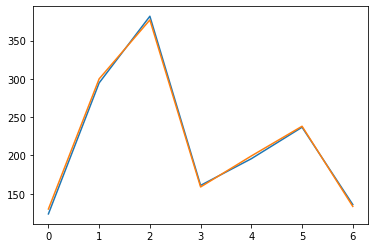

In [132]:
#Curve of predicted value and original value
plt.plot(predictions[0]*100)
plt.plot(Y_test2[0]*100)